In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline

In [64]:
#Leer datos de ruido mensuales de 2017 y 2018
ruido1 = pd.read_csv('201901_anio2017.csv',encoding = 'iso-8859-1',delimiter = ';',decimal = ',',na_values = 'N/D')
ruido2 = pd.read_csv('201901_anio2018.csv',encoding = 'iso-8859-1',delimiter = ';',decimal = ',',na_values = 'N/D')
ruido = pd.concat([ruido1, ruido2])
ruido.head(10)

,Fecha,NMT,Situación,Ld,Le,Ln,LAeq24,LAS01,LAS10,LAS50,LAS90,LAS99
0,ene-17,1,Paseo de Recoletos,69.1,69.2,66.5,68.2,74.0,71.3,65.8,57.9,50.0
1,ene-17,2,Carlos V,70.2,69.8,66.9,69.3,75.5,71.4,67.9,61.2,54.8
2,ene-17,3,Plaza del Carmen,67.7,60.9,62.8,65.8,75.4,66.0,58.5,53.4,50.7
3,ene-17,4,Plaza de España,65.9,65.9,62.4,65.0,72.7,67.4,63.5,56.4,49.1
4,ene-17,5,Barrio del Pilar,65.7,66.2,60.1,64.6,74.4,67.0,59.7,46.9,37.9
5,ene-17,6,Gregorio Marañón,71.9,71.4,67.2,70.7,77.7,74.2,67.5,60.3,52.0
6,ene-17,8,Escuelas Aguirre,68.1,67.6,64.2,67.0,73.6,70.2,65.3,57.5,47.3
7,ene-17,10,Cuatro Caminos,66.5,65.5,60.2,65.0,73.4,68.8,61.0,51.1,45.2
8,ene-17,11,Ramón y Cajal,69.6,68.8,63.2,68.2,74.8,71.4,66.5,52.2,39.2
9,ene-17,12,Plaza Manuel Becerra,65.9,65.0,62.1,64.8,74.3,65.5,61.3,53.4,46.0


In [28]:
ruido.describe()

,NMT,Ld,Le,Ln,LAeq24,LAS01,LAS10,LAS50,LAS90,LAS99
count,742.000000,742.000000,742.000000,742.000000,742.000000,741.000000,741.000000,741.000000,741.000000,741.000000
mean,23.834232,63.027089,62.567385,57.575067,61.897844,69.834143,64.430499,58.092173,48.507692,42.326181
std,19.164696,4.797549,4.867088,5.584946,4.811659,4.479229,4.971863,5.719671,6.851390,5.941693
min,1.000000,47.800000,44.900000,41.900000,46.200000,53.600000,48.800000,43.500000,34.600000,28.800000
25%,10.000000,59.925000,59.625000,53.500000,58.825000,66.800000,61.300000,53.500000,42.800000,37.100000
50%,19.000000,62.900000,62.500000,57.950000,61.900000,70.000000,64.600000,58.300000,46.800000,41.000000
75%,30.000000,66.600000,65.875000,61.575000,65.300000,73.000000,67.900000,62.600000,54.600000,48.400000
max,86.000000,80.000000,76.300000,73.700000,77.200000,83.800000,74.600000,68.400000,62.400000,56.600000


In [67]:
# Identificar las tres estaciones con más ruido durante la mañana
ruido.groupby(['NMT'])['Ld'].mean().sort_values(ascending=False).head(3)

NMT
6     71.254167
2     70.483333
11    69.741667
Name: Ld, dtype: float64

In [68]:
# Identificar las tres estaciones con más ruido durante la tarde
ruido.groupby(['NMT'])['Le'].mean().sort_values(ascending=False).head(3)

NMT
6     70.675000
2     70.441667
11    68.491667
Name: Le, dtype: float64

In [70]:
# Identificar las tres estaciones con más ruido durante la noche
ruido.groupby(['NMT'])['Ln'].mean().sort_values(ascending=False).head(3)

NMT
6    66.716667
2    66.558333
1    65.516667
Name: Ln, dtype: float64

In [75]:
# Identificar las tres estaciones con más pico de ruido
ruido.groupby(['NMT'])['LAS10'].mean().sort_values(ascending=False).head(3)

NMT
6     73.495833
2     71.062500
11    70.908333
Name: LAS10, dtype: float64

In [94]:
params = {'legend.fontsize': 14,
          'figure.figsize': (15, 8),
         'axes.labelsize': 14,
         'axes.titlesize':14,
         'xtick.labelsize':14,
         'ytick.labelsize':14}

estacion = ruido['NMT'].unique()



In [99]:
def grafica(columna,estaciones,titulo,imagen):
    
    plt.rcParams.update(params)

    for e in estacion:
        serie = ruido[ruido['NMT'] == e]
        
        if e in estaciones:
            colores=sns.color_palette()[1]
            linea = '-'
        else:
            colores=sns.color_palette()[4]
            linea = ':'
        x = serie['Fecha']
        y = serie[columna]   
        plt.plot(x, y,lw=1, ls=linea, alpha=1, color=colores)

    plt.xticks(x,rotation = 60)
    plt.axis(ymin= 45 , ymax=80)
    plt.title(titulo,fontsize= 18)
    plt.savefig(imagen, bbox_inches='tight', pad_inches=0.3, dpi=220)
    plt.show()

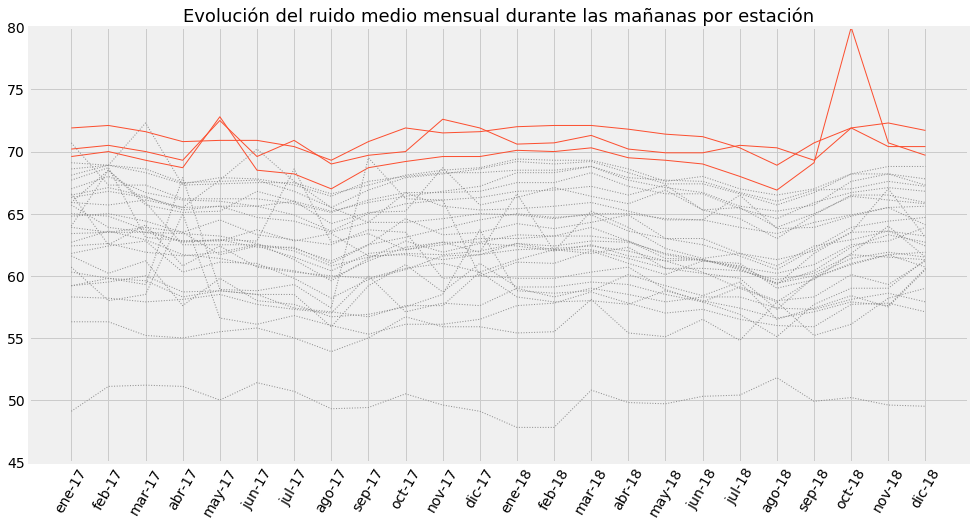

In [100]:
# Evolución del ruido durante las mañanas
grafica('Ld',(2,6,11),'Evolución del ruido medio mensual durante las mañanas por estación',
       'images/ruido_mañanas_por_estacion.png')


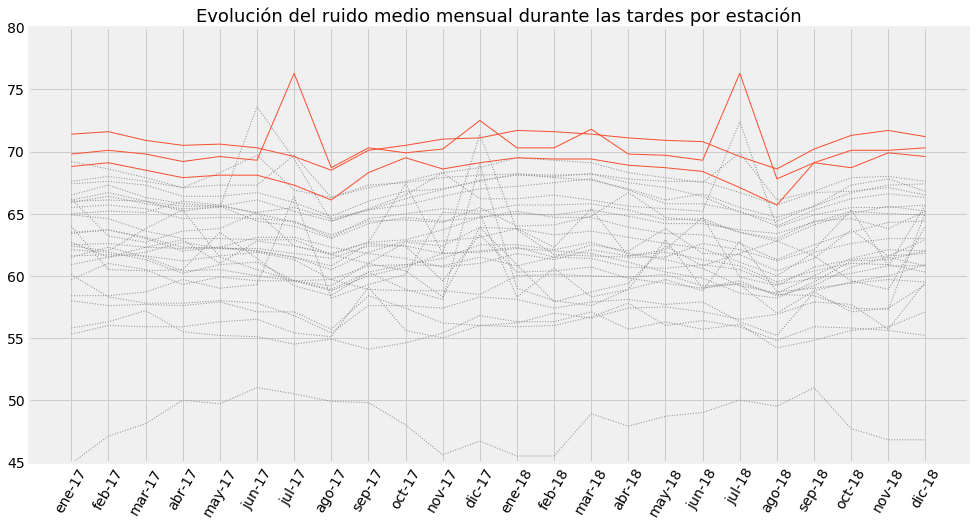

In [101]:
# Evolución del ruido durante las tardes
grafica('Le',(2,6,11),'Evolución del ruido medio mensual durante las tardes por estación',
       'images/ruido_tardes_por_estacion.png')


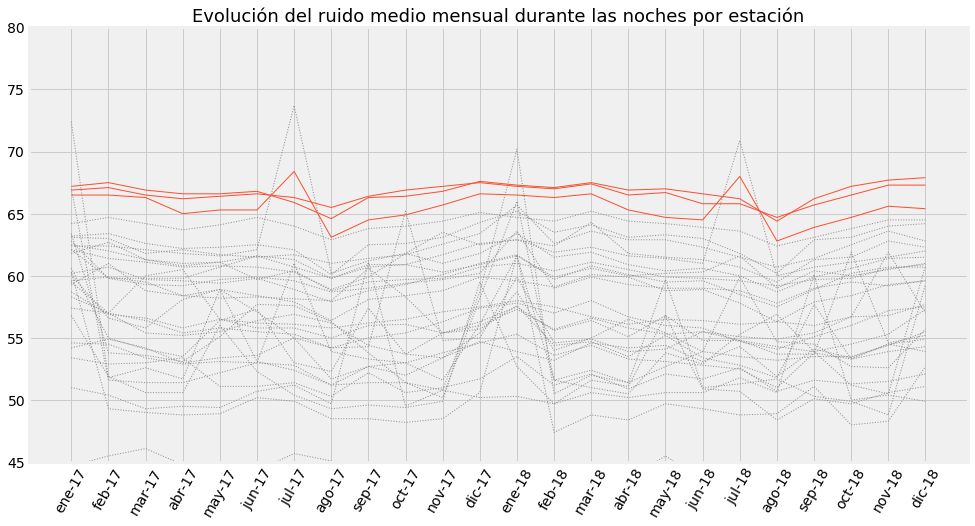

In [103]:
# Evolución del ruido durante las noches
grafica('Ln',(2,6,1),'Evolución del ruido medio mensual durante las noches por estación',
       'images/ruido_noches_por_estacion.png')


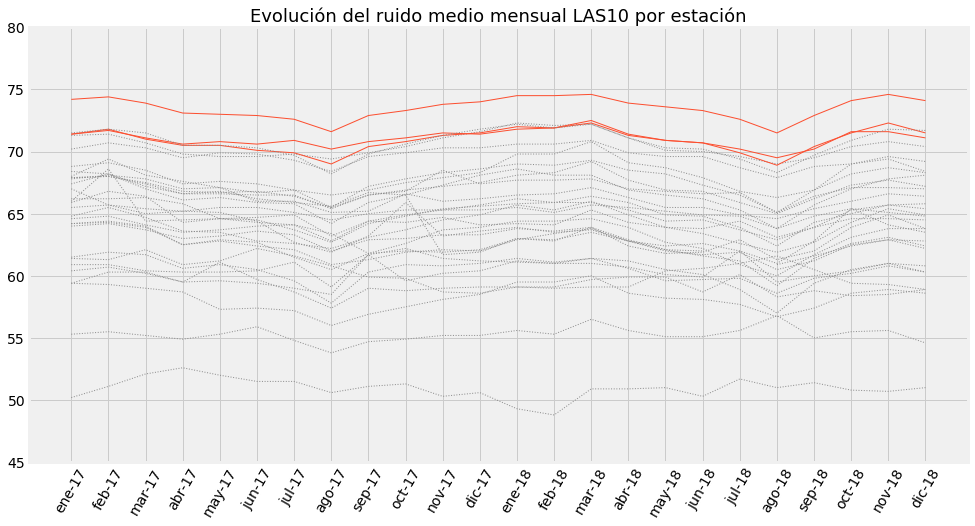

In [104]:
# Evolución del ruido durante los moentos de pico
grafica('LAS10',(2,6,11),'Evolución del ruido medio mensual LAS10 por estación',
       'images/ruido_LAS10_por_estacion.png')
